In [92]:
import pandas as pd
data = pd.read_csv("E_Vo_withDatafromPeriodicTable.csv")
df= pd.DataFrame(data)

In [93]:
df.keys()

Index(['Chemical formula', 'A', 'B', 'In literature', 'Valence A', 'Valence B',
       'Radius A [ang]', 'Radius B [ang]', 'Lowest distortion',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'a [ang]', 'b [ang]', 'c [ang]', 'alpha [deg]', 'beta [deg]',
       'gamma [deg]', 'A-AtomicNumber', 'A-AtomicMass', 'A-NumberofNeutrons',
       'A-NumberofProtons', 'A-NumberofElectrons', 'A-Period', 'A-Group',
       'A-AtomicRadius', 'A-Electronegativity', 'A-FirstIonization',
       'A-Density', 'A-MeltingPoint', 'A-BoilingPoint', 'A-NumberOfIsotopes',
       'A-SpecificHeat', 'A-NumberofShells', 'B-AtomicNumber', 'B-AtomicMass',
       'B-NumberofNeutrons', 'B-NumberofProtons', 'B-NumberofElectrons',
       'B-Period', 'B-Group', 'B-Electronegativity', 'B-FirstIonization',
       'B-Density', 'B-MeltingPoint', 'B-BoilingPoint', 'B-NumberOfIsotopes',
       'B-SpecificHeat', 'B-NumberofShells',

In [94]:
df_temp1= [df['B'] == 'Fe']
df_temp2= [df['B'] == 'Co']

In [95]:
name = ['Fe','Co']
df_temp = df[df['B'].isin(name)]

In [96]:
df_temp.head()

,Chemical formula,A,B,In literature,Valence A,Valence B,Radius A [ang],Radius B [ang],Lowest distortion,Formation energy [eV/atom],...,B-Group,B-Electronegativity,B-FirstIonization,B-Density,B-MeltingPoint,B-BoilingPoint,B-NumberOfIsotopes,B-SpecificHeat,B-NumberofShells,Vacancy energy [eV/O atom]
876,AcCoO3,Ac,Co,False,element not in BV,element not in BV,1.12,0.63,rhombohedral,-2.426,...,9.0,1.88,7.881,8.86,1768.15,3200,14,0.421,4,3.33
877,AgCoO3,Ag,Co,False,not balanced,not balanced,1.28,0.63,orthorhombic,-0.481,...,9.0,1.88,7.881,8.86,1768.15,3200,14,0.421,4,-
878,AlCoO3,Al,Co,False,3,3,0.54,0.61,cubic,-0.957,...,9.0,1.88,7.881,8.86,1768.15,3200,14,0.421,4,-1.991
879,AsCoO3,As,Co,False,3,3,0.58,0.61,cubic,-0.584,...,9.0,1.88,7.881,8.86,1768.15,3200,14,0.421,4,0.089
880,AuCoO3,Au,Co,False,element not in BV,element not in BV,0.93,0.63,cubic,-0.071,...,9.0,1.88,7.881,8.86,1768.15,3200,14,0.421,4,-2.143


In [97]:
df_temp = df_temp[['Radius A [ang]', 'A-Density','A-AtomicNumber','A-SpecificHeat','B-AtomicMass','Vacancy energy [eV/O atom]']]

In [98]:
df_temp

,Radius A [ang],A-Density,A-AtomicNumber,A-SpecificHeat,B-AtomicMass,Vacancy energy [eV/O atom]
876,1.12,10.100,89,0.120,58.933,3.33
877,1.28,10.500,47,0.235,58.933,-
878,0.54,2.700,13,0.897,58.933,-1.991
879,0.58,5.780,33,0.329,58.933,0.089
880,0.93,19.300,79,0.129,58.933,-2.143
881,0.27,2.340,5,1.026,58.933,-2.534
882,1.61,3.590,56,0.204,58.933,0.663
883,0.45,1.850,4,1.825,58.933,-2.203
884,1.38,9.810,83,0.122,58.933,2.897
885,1.34,1.540,20,0.647,58.933,0.72


In [99]:
# from sklearn.preprocessing import LabelEncoder
# lt = LabelEncoder()
# df_temp['Lowest distortion'] = lt.fit_transform(df_temp['Lowest distortion'])
# df_temp['A'] = lt.fit_transform(df_temp['A'])

In [100]:
# df_temp = df_temp.drop(['Chemical formula','alpha [deg]','beta [deg]','gamma [deg]','In literature'], axis = 1)
# df_temp.head()

In [101]:
 import numpy as np
# df_temp['Valence A'].replace(r'\s+', np.nan, regex=True, inplace=True)
# df_temp['Valence B'].replace(r'\s+', np.nan, regex=True, inplace=True)
#weirdString = '-'#df_temp['Vacancy energy [eV/O atom]'][0:]
#df_temp['Vacancy energy [eV/O atom]'].replace(weirdString, np.nan, inplace=True)
df_temp = df_temp.replace(to_replace='-',value=np.nan)
display(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 876 to 1459
Data columns (total 6 columns):
Radius A [ang]                146 non-null float64
A-Density                     146 non-null float64
A-AtomicNumber                146 non-null int64
A-SpecificHeat                136 non-null float64
B-AtomicMass                  146 non-null float64
Vacancy energy [eV/O atom]    124 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.0+ KB


None

In [102]:
# type(df_temp['Vacancy energy [eV/O atom]'][85])
# df_temp['Vacancy energy [eV/O atom]'][85]
#weirdString == df_temp['Vacancy energy [eV/O atom]'][85]

In [103]:
df_temp = df_temp.dropna()

In [104]:
df_temp.keys()

Index(['Radius A [ang]', 'A-Density', 'A-AtomicNumber', 'A-SpecificHeat',
       'B-AtomicMass', 'Vacancy energy [eV/O atom]'],
      dtype='object')

In [105]:
#df_temp = df_temp.drop(['B', 'A'], axis=1)
df_temp = df_temp.astype(float)

In [106]:
df_temp.keys()

Index(['Radius A [ang]', 'A-Density', 'A-AtomicNumber', 'A-SpecificHeat',
       'B-AtomicMass', 'Vacancy energy [eV/O atom]'],
      dtype='object')

In [107]:
#df_temp = df_temp.drop(['B', 'A'], axis=1)
#df_temp = df_temp.astype(float)
#df_temp = df_temp[['Radius A [ang]','Formation energy [eV/atom]','Stability [eV/atom]',
#                   'Volume per atom [A^3/atom]','Magnetic moment [mu_B]','a [ang]',
#                   'Vacancy energy [eV/O atom]']]
display(df_temp.head())
display(df_temp.describe())

,Radius A [ang],A-Density,A-AtomicNumber,A-SpecificHeat,B-AtomicMass,Vacancy energy [eV/O atom]
876,1.12,10.10,89.0,0.120,58.933,3.330
878,0.54,2.70,13.0,0.897,58.933,-1.991
879,0.58,5.78,33.0,0.329,58.933,0.089
880,0.93,19.30,79.0,0.129,58.933,-2.143
881,0.27,2.34,5.0,1.026,58.933,-2.534


,Radius A [ang],A-Density,A-AtomicNumber,A-SpecificHeat,B-AtomicMass,Vacancy energy [eV/O atom]
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,0.958983,8.575542,48.644068,0.396703,57.336661,-0.063907
std,0.327099,5.598360,24.603358,0.521778,1.549693,2.549775
min,0.270000,0.534000,3.000000,0.113000,55.845000,-11.419000
25%,0.697500,5.260000,27.500000,0.154250,55.845000,-1.636250
50%,0.920000,7.480000,48.500000,0.232500,55.845000,0.079500
75%,1.170000,11.025000,70.750000,0.412750,58.933000,1.834250
max,1.720000,22.600000,92.000000,3.582000,58.933000,4.135000


In [108]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [109]:
X = df_temp.values[:, 0:-1]
# X = df_temp.values[]
Y = df_temp.values[:,-1]
print(Y)

[  3.33   -1.991   0.089  -2.143  -2.534   0.663  -2.203   2.897   0.72
  -0.458   3.21   -2.8    -1.758  -1.005   2.225   1.59   -1.547 -11.419
   0.905   0.8    -1.207   2.32    0.504  -5.721  -2.955   2.964   0.263
   1.89   -0.239  -0.95    0.679   0.373   3.124  -2.69    0.756  -0.712
  -4.105   0.199  -5.095  -0.711  -2.148   2.075   1.089  -1.423   2.931
   0.687  -0.411   2.511   1.913   3.147   0.232  -0.542   2.096  -1.853
  -2.7    -1.336   1.235   4.135  -2.445  -0.724  -1.534  -3.619   1.185
  -1.666   2.587   1.132   0.208   4.094  -0.624  -1.245  -1.512   3.193
   1.667  -1.446  -2.251   3.384   0.461  -0.324   3.094  -4.804  -0.61
   4.037  -0.831   2.726   0.07    0.308  -2.265  -0.436  -0.263   3.83
  -4.938   0.789  -1.858   3.968  -3.036  -1.062  -4.592  -2.494  -2.602
   1.172   1.505  -1.814   3.624   0.792   1.378  -4.452   3.264  -0.992
   3.482  -0.463  -0.727   2.865   2.177  -2.876   3.19    1.336  -0.75
   1.3  ]


In [110]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [111]:
# model = LogisticRegression()
# rfe = RFE(model, 4)
# fit = rfe.fit(X, Y)

In [112]:
# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))

In [113]:
# import seaborn as sns
# #sns.p(df_temp[0:5])
# #pd.plotting.scatter_matrix(df_temp[11:14])
# sns.pairplot(df_temp.iloc[:,11:13], hue = df_temp.iloc[:, 14])

In [114]:
# fit.ranking_

In [115]:
# ind = np.where(fit.ranking_ == 1)
# idx = [item for item in ind[0]]

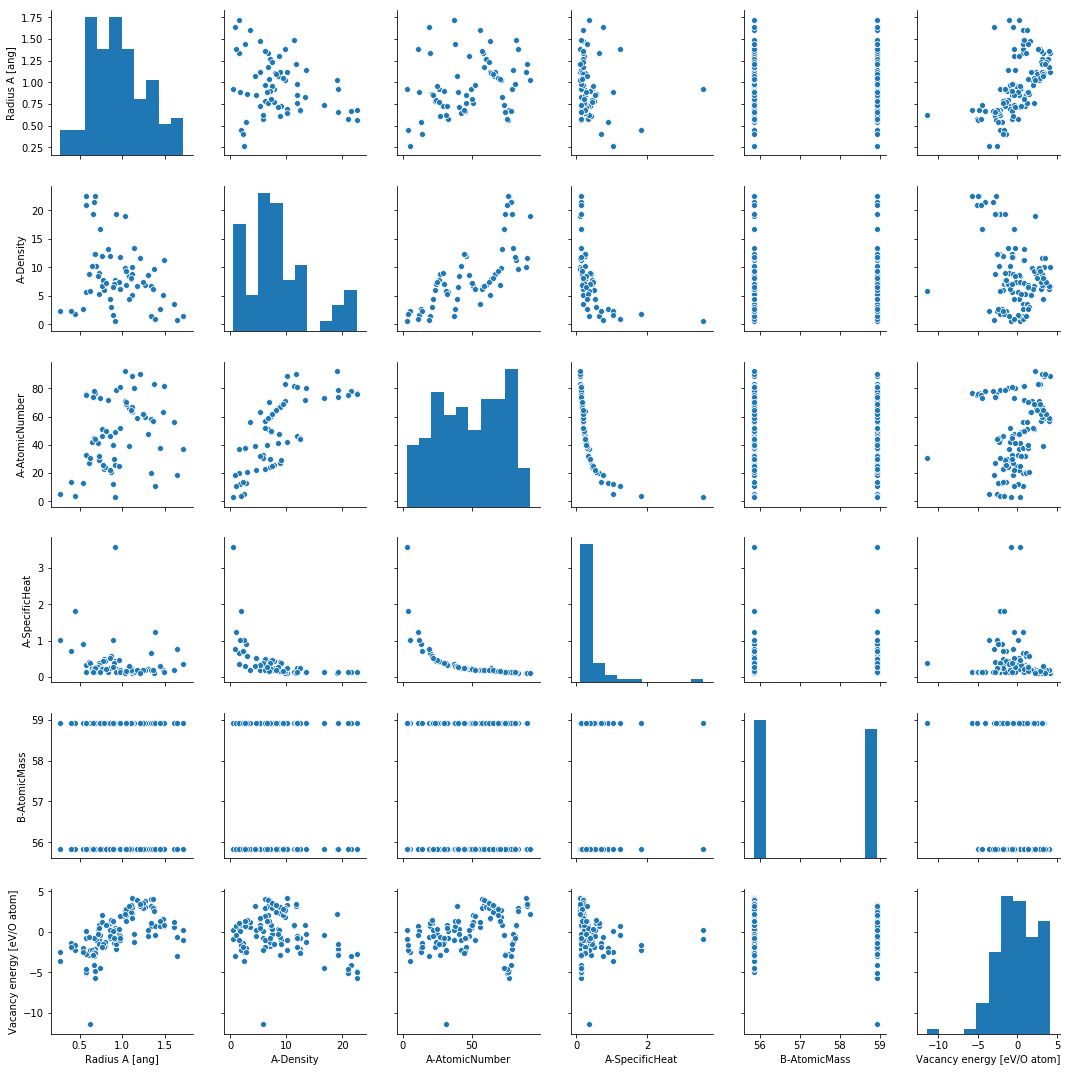

In [116]:
import seaborn as sns
display(sns.pairplot(df_temp))
import matplotlib.pyplot as plt
plt.savefig("pairplot_features_selected.png")

In [117]:
display(X.shape)
display(Y.shape)

(118, 5)

(118,)

In [118]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
#scaler  = MinMaxScaler()
# X = scaler.fit_transform(X)
#Y = scaler.fit_transform(Y.reshape(-1,1))

In [148]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = SVR(gamma=0.1, kernel='rbf',C = 5)
clf.fit(X_train, Y_train) 
print(len(X_train), len(X_test))

94 24


0.9808579465540624


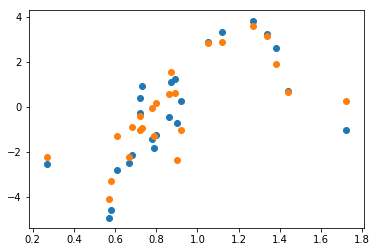

In [149]:
Y_pred = clf.predict(X_test)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_pred,Y_test))
plt.scatter(X_test[:,0], Y_test)
plt.scatter(X_test[:,0], Y_pred)

1.6893682916666666


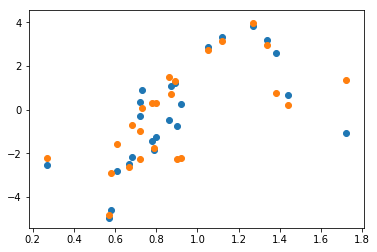

In [154]:
from sklearn.neighbors import KNeighborsRegressor
log = KNeighborsRegressor(n_neighbors=1)
log.fit(X_train, Y_train) 
Y_pred = log.predict(X_test)
print(mean_squared_error(Y_pred,Y_test))
plt.scatter(X_test[:, 0], Y_test)
plt.scatter(X_test[:, 0], Y_pred)

In [31]:
Y_train

array([  2.931,  -1.758,   1.59 ,  -1.512,  -0.992,  -2.955,   0.208,
         0.504,  -4.105,  -1.336,   4.037,   0.679,   1.185,   1.667,
        -0.458,  -2.69 ,  -4.452,  -0.624,  -0.239,   2.511,   0.07 ,
         0.663,  -0.324,   4.094,  -0.711,   3.147,  -0.712,  -1.547,
         1.132,   0.756,   0.308,   2.897,  -1.423,   2.177,   3.094,
         1.89 ,   0.8  ,  -3.036,   0.792,   2.964,   0.72 ,  -1.005,
         2.726,  -2.143, -11.419,  -5.095,   0.789,  -2.203,   0.461,
        -1.814,   3.968,  -2.7  ,   0.232,   3.482,  -0.411,  -0.61 ,
        -3.619,   3.19 ,  -4.804,   1.336,   2.075,  -2.445,   1.913,
         1.505,   4.135,   3.384,   3.124,  -0.727,  -0.724,  -1.666,
        -2.602,   0.199,  -0.95 ,   1.378,  -1.991,   2.096,   2.32 ,
         0.089,  -5.721,   1.172,  -0.436,  -2.876,  -2.251,  -2.265,
        -0.831,   1.3  ,  -1.207,  -1.534,   3.193,   3.264,   2.225,
        -1.858,  -0.542,   3.624])

In [193]:
#nn model
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras import optimizers
shape = X_train.shape
model = Sequential()
model.add(Dense(10, input_shape = [shape[1],], activation = 'sigmoid'))
model.add(Dense(20, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1, activation = 'linear'))

sgd = optimizers.SGD(lr=0.1, decay=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

#history = model.fit(X_train,Y_tarin,epochs=100,batch_size = 4)

In [234]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(10, kernel_initializer='normal',input_dim =shape[1], activation='tanh'))

# The Hidden Layers :
NN_model.add(Dense(10, kernel_initializer='normal',activation='tanh'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
# NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adagrad', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_96 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 11        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [240]:
history = NN_model.fit(X_train,Y_train,epochs=2000,batch_size = 4,validation_data=[X_test,Y_test])

Train on 94 samples, validate on 24 samples
Epoch 1/2000
94/94 [==============================] - 0s 683us/step - loss: 1.0253 - mean_absolute_error: 1.0253 - val_loss: 0.7198 - val_mean_absolute_error: 0.7198
Epoch 2/2000
94/94 [==============================] - 0s 453us/step - loss: 1.0241 - mean_absolute_error: 1.0241 - val_loss: 0.7192 - val_mean_absolute_error: 0.7192
Epoch 3/2000
94/94 [==============================] - 0s 580us/step - loss: 1.0277 - mean_absolute_error: 1.0277 - val_loss: 0.7222 - val_mean_absolute_error: 0.7222
Epoch 4/2000
94/94 [==============================] - 0s 495us/step - loss: 1.0274 - mean_absolute_error: 1.0274 - val_loss: 0.7244 - val_mean_absolute_error: 0.7244
Epoch 5/2000
94/94 [==============================] - 0s 492us/step - loss: 1.0255 - mean_absolute_error: 1.0255 - val_loss: 0.7217 - val_mean_absolute_error: 0.7217
Epoch 6/2000
94/94 [==============================] - 0s 443us/step - loss: 1.0241 - mean_absolute_error: 1.0241 - val_loss: 0

Epoch 50/2000
94/94 [==============================] - 0s 409us/step - loss: 1.0212 - mean_absolute_error: 1.0212 - val_loss: 0.7117 - val_mean_absolute_error: 0.7117
Epoch 51/2000
94/94 [==============================] - 0s 355us/step - loss: 1.0230 - mean_absolute_error: 1.0230 - val_loss: 0.7170 - val_mean_absolute_error: 0.7170
Epoch 52/2000
94/94 [==============================] - 0s 362us/step - loss: 1.0220 - mean_absolute_error: 1.0220 - val_loss: 0.7157 - val_mean_absolute_error: 0.7157
Epoch 53/2000
94/94 [==============================] - 0s 357us/step - loss: 1.0210 - mean_absolute_error: 1.0210 - val_loss: 0.7179 - val_mean_absolute_error: 0.7179
Epoch 54/2000
94/94 [==============================] - 0s 354us/step - loss: 1.0216 - mean_absolute_error: 1.0216 - val_loss: 0.7153 - val_mean_absolute_error: 0.7153
Epoch 55/2000
94/94 [==============================] - 0s 355us/step - loss: 1.0214 - mean_absolute_error: 1.0214 - val_loss: 0.7162 - val_mean_absolute_error: 0.716

94/94 [==============================] - 0s 408us/step - loss: 1.0192 - mean_absolute_error: 1.0192 - val_loss: 0.7113 - val_mean_absolute_error: 0.7113
Epoch 100/2000
94/94 [==============================] - 0s 425us/step - loss: 1.0194 - mean_absolute_error: 1.0194 - val_loss: 0.7085 - val_mean_absolute_error: 0.7085
Epoch 101/2000
94/94 [==============================] - 0s 400us/step - loss: 1.0185 - mean_absolute_error: 1.0185 - val_loss: 0.7068 - val_mean_absolute_error: 0.7068
Epoch 102/2000
94/94 [==============================] - 0s 401us/step - loss: 1.0165 - mean_absolute_error: 1.0165 - val_loss: 0.7091 - val_mean_absolute_error: 0.7091
Epoch 103/2000
94/94 [==============================] - 0s 431us/step - loss: 1.0168 - mean_absolute_error: 1.0168 - val_loss: 0.7103 - val_mean_absolute_error: 0.7103
Epoch 104/2000
94/94 [==============================] - 0s 392us/step - loss: 1.0168 - mean_absolute_error: 1.0168 - val_loss: 0.7112 - val_mean_absolute_error: 0.7112
Epoch 1

Epoch 148/2000
94/94 [==============================] - 0s 438us/step - loss: 1.0159 - mean_absolute_error: 1.0159 - val_loss: 0.6998 - val_mean_absolute_error: 0.6998
Epoch 149/2000
94/94 [==============================] - 0s 424us/step - loss: 1.0137 - mean_absolute_error: 1.0137 - val_loss: 0.7002 - val_mean_absolute_error: 0.7002
Epoch 150/2000
94/94 [==============================] - 0s 388us/step - loss: 1.0150 - mean_absolute_error: 1.0150 - val_loss: 0.6983 - val_mean_absolute_error: 0.6983
Epoch 151/2000
94/94 [==============================] - 0s 405us/step - loss: 1.0136 - mean_absolute_error: 1.0136 - val_loss: 0.7031 - val_mean_absolute_error: 0.7031
Epoch 152/2000
94/94 [==============================] - 0s 394us/step - loss: 1.0151 - mean_absolute_error: 1.0151 - val_loss: 0.7033 - val_mean_absolute_error: 0.7033
Epoch 153/2000
94/94 [==============================] - 0s 381us/step - loss: 1.0157 - mean_absolute_error: 1.0157 - val_loss: 0.7047 - val_mean_absolute_error:

Epoch 197/2000
94/94 [==============================] - 0s 473us/step - loss: 1.0104 - mean_absolute_error: 1.0104 - val_loss: 0.6975 - val_mean_absolute_error: 0.6975
Epoch 198/2000
94/94 [==============================] - 0s 393us/step - loss: 1.0107 - mean_absolute_error: 1.0107 - val_loss: 0.6987 - val_mean_absolute_error: 0.6987
Epoch 199/2000
94/94 [==============================] - 0s 400us/step - loss: 1.0105 - mean_absolute_error: 1.0105 - val_loss: 0.6987 - val_mean_absolute_error: 0.6987
Epoch 200/2000
94/94 [==============================] - 0s 404us/step - loss: 1.0114 - mean_absolute_error: 1.0114 - val_loss: 0.6979 - val_mean_absolute_error: 0.6979
Epoch 201/2000
94/94 [==============================] - 0s 406us/step - loss: 1.0114 - mean_absolute_error: 1.0114 - val_loss: 0.6994 - val_mean_absolute_error: 0.6994
Epoch 202/2000
94/94 [==============================] - 0s 385us/step - loss: 1.0101 - mean_absolute_error: 1.0101 - val_loss: 0.6997 - val_mean_absolute_error:

Epoch 246/2000
94/94 [==============================] - 0s 436us/step - loss: 1.0070 - mean_absolute_error: 1.0070 - val_loss: 0.6919 - val_mean_absolute_error: 0.6919
Epoch 247/2000
94/94 [==============================] - 0s 452us/step - loss: 1.0076 - mean_absolute_error: 1.0076 - val_loss: 0.6939 - val_mean_absolute_error: 0.6939
Epoch 248/2000
94/94 [==============================] - 0s 437us/step - loss: 1.0087 - mean_absolute_error: 1.0087 - val_loss: 0.6948 - val_mean_absolute_error: 0.6948
Epoch 249/2000
94/94 [==============================] - 0s 409us/step - loss: 1.0036 - mean_absolute_error: 1.0036 - val_loss: 0.6988 - val_mean_absolute_error: 0.6988
Epoch 250/2000
94/94 [==============================] - 0s 391us/step - loss: 1.0065 - mean_absolute_error: 1.0065 - val_loss: 0.6965 - val_mean_absolute_error: 0.6965
Epoch 251/2000
94/94 [==============================] - 0s 389us/step - loss: 1.0068 - mean_absolute_error: 1.0068 - val_loss: 0.6965 - val_mean_absolute_error:

Epoch 295/2000
94/94 [==============================] - 0s 409us/step - loss: 1.0056 - mean_absolute_error: 1.0056 - val_loss: 0.6829 - val_mean_absolute_error: 0.6829
Epoch 296/2000
94/94 [==============================] - 0s 395us/step - loss: 1.0043 - mean_absolute_error: 1.0043 - val_loss: 0.6847 - val_mean_absolute_error: 0.6847
Epoch 297/2000
94/94 [==============================] - 0s 401us/step - loss: 1.0052 - mean_absolute_error: 1.0052 - val_loss: 0.6872 - val_mean_absolute_error: 0.6872
Epoch 298/2000
94/94 [==============================] - 0s 385us/step - loss: 1.0057 - mean_absolute_error: 1.0057 - val_loss: 0.6876 - val_mean_absolute_error: 0.6876
Epoch 299/2000
94/94 [==============================] - 0s 360us/step - loss: 1.0050 - mean_absolute_error: 1.0050 - val_loss: 0.6889 - val_mean_absolute_error: 0.6889
Epoch 300/2000
94/94 [==============================] - 0s 399us/step - loss: 1.0061 - mean_absolute_error: 1.0061 - val_loss: 0.6896 - val_mean_absolute_error:

Epoch 344/2000
94/94 [==============================] - 0s 434us/step - loss: 1.0032 - mean_absolute_error: 1.0032 - val_loss: 0.6839 - val_mean_absolute_error: 0.6839
Epoch 345/2000
94/94 [==============================] - 0s 394us/step - loss: 0.9992 - mean_absolute_error: 0.9992 - val_loss: 0.6801 - val_mean_absolute_error: 0.6801
Epoch 346/2000
94/94 [==============================] - 0s 427us/step - loss: 1.0035 - mean_absolute_error: 1.0035 - val_loss: 0.6810 - val_mean_absolute_error: 0.6810
Epoch 347/2000
94/94 [==============================] - 0s 409us/step - loss: 1.0035 - mean_absolute_error: 1.0035 - val_loss: 0.6835 - val_mean_absolute_error: 0.6835
Epoch 348/2000
94/94 [==============================] - 0s 393us/step - loss: 1.0009 - mean_absolute_error: 1.0009 - val_loss: 0.6853 - val_mean_absolute_error: 0.6853
Epoch 349/2000
94/94 [==============================] - 0s 408us/step - loss: 1.0033 - mean_absolute_error: 1.0033 - val_loss: 0.6829 - val_mean_absolute_error:

Epoch 393/2000
94/94 [==============================] - 0s 419us/step - loss: 0.9991 - mean_absolute_error: 0.9991 - val_loss: 0.6870 - val_mean_absolute_error: 0.6870
Epoch 394/2000
94/94 [==============================] - 0s 403us/step - loss: 0.9976 - mean_absolute_error: 0.9976 - val_loss: 0.6850 - val_mean_absolute_error: 0.6850
Epoch 395/2000
94/94 [==============================] - 0s 394us/step - loss: 0.9994 - mean_absolute_error: 0.9994 - val_loss: 0.6842 - val_mean_absolute_error: 0.6842
Epoch 396/2000
94/94 [==============================] - 0s 421us/step - loss: 0.9993 - mean_absolute_error: 0.9993 - val_loss: 0.6808 - val_mean_absolute_error: 0.6808
Epoch 397/2000
94/94 [==============================] - 0s 411us/step - loss: 0.9995 - mean_absolute_error: 0.9995 - val_loss: 0.6773 - val_mean_absolute_error: 0.6773
Epoch 398/2000
94/94 [==============================] - 0s 398us/step - loss: 0.9994 - mean_absolute_error: 0.9994 - val_loss: 0.6776 - val_mean_absolute_error:

Epoch 442/2000
94/94 [==============================] - 0s 433us/step - loss: 0.9952 - mean_absolute_error: 0.9952 - val_loss: 0.6768 - val_mean_absolute_error: 0.6768
Epoch 443/2000
94/94 [==============================] - 0s 391us/step - loss: 0.9977 - mean_absolute_error: 0.9977 - val_loss: 0.6763 - val_mean_absolute_error: 0.6763
Epoch 444/2000
94/94 [==============================] - 0s 395us/step - loss: 0.9961 - mean_absolute_error: 0.9961 - val_loss: 0.6758 - val_mean_absolute_error: 0.6758
Epoch 445/2000
94/94 [==============================] - 0s 406us/step - loss: 0.9962 - mean_absolute_error: 0.9962 - val_loss: 0.6782 - val_mean_absolute_error: 0.6782
Epoch 446/2000
94/94 [==============================] - 0s 403us/step - loss: 0.9954 - mean_absolute_error: 0.9954 - val_loss: 0.6762 - val_mean_absolute_error: 0.6762
Epoch 447/2000
94/94 [==============================] - 0s 395us/step - loss: 0.9950 - mean_absolute_error: 0.9950 - val_loss: 0.6769 - val_mean_absolute_error:

Epoch 491/2000
94/94 [==============================] - 0s 428us/step - loss: 0.9931 - mean_absolute_error: 0.9931 - val_loss: 0.6697 - val_mean_absolute_error: 0.6697
Epoch 492/2000
94/94 [==============================] - 0s 365us/step - loss: 0.9943 - mean_absolute_error: 0.9943 - val_loss: 0.6706 - val_mean_absolute_error: 0.6706
Epoch 493/2000
94/94 [==============================] - 0s 366us/step - loss: 0.9923 - mean_absolute_error: 0.9923 - val_loss: 0.6715 - val_mean_absolute_error: 0.6715
Epoch 494/2000
94/94 [==============================] - 0s 414us/step - loss: 0.9935 - mean_absolute_error: 0.9935 - val_loss: 0.6730 - val_mean_absolute_error: 0.6730
Epoch 495/2000
94/94 [==============================] - 0s 411us/step - loss: 0.9930 - mean_absolute_error: 0.9930 - val_loss: 0.6736 - val_mean_absolute_error: 0.6736
Epoch 496/2000
94/94 [==============================] - 0s 406us/step - loss: 0.9911 - mean_absolute_error: 0.9911 - val_loss: 0.6754 - val_mean_absolute_error:

Epoch 540/2000
94/94 [==============================] - 0s 398us/step - loss: 0.9892 - mean_absolute_error: 0.9892 - val_loss: 0.6744 - val_mean_absolute_error: 0.6744
Epoch 541/2000
94/94 [==============================] - 0s 380us/step - loss: 0.9907 - mean_absolute_error: 0.9907 - val_loss: 0.6725 - val_mean_absolute_error: 0.6725
Epoch 542/2000
94/94 [==============================] - 0s 386us/step - loss: 0.9880 - mean_absolute_error: 0.9880 - val_loss: 0.6702 - val_mean_absolute_error: 0.6702
Epoch 543/2000
94/94 [==============================] - 0s 461us/step - loss: 0.9894 - mean_absolute_error: 0.9894 - val_loss: 0.6704 - val_mean_absolute_error: 0.6704
Epoch 544/2000
94/94 [==============================] - 0s 395us/step - loss: 0.9899 - mean_absolute_error: 0.9899 - val_loss: 0.6697 - val_mean_absolute_error: 0.6697
Epoch 545/2000
94/94 [==============================] - 0s 422us/step - loss: 0.9911 - mean_absolute_error: 0.9911 - val_loss: 0.6698 - val_mean_absolute_error:

Epoch 589/2000
94/94 [==============================] - 0s 419us/step - loss: 0.9884 - mean_absolute_error: 0.9884 - val_loss: 0.6702 - val_mean_absolute_error: 0.6702
Epoch 590/2000
94/94 [==============================] - 0s 367us/step - loss: 0.9863 - mean_absolute_error: 0.9863 - val_loss: 0.6698 - val_mean_absolute_error: 0.6698
Epoch 591/2000
94/94 [==============================] - 0s 382us/step - loss: 0.9857 - mean_absolute_error: 0.9857 - val_loss: 0.6751 - val_mean_absolute_error: 0.6751
Epoch 592/2000
94/94 [==============================] - 0s 417us/step - loss: 0.9855 - mean_absolute_error: 0.9855 - val_loss: 0.6718 - val_mean_absolute_error: 0.6718
Epoch 593/2000
94/94 [==============================] - 0s 398us/step - loss: 0.9884 - mean_absolute_error: 0.9884 - val_loss: 0.6679 - val_mean_absolute_error: 0.6679
Epoch 594/2000
94/94 [==============================] - 0s 406us/step - loss: 0.9886 - mean_absolute_error: 0.9886 - val_loss: 0.6696 - val_mean_absolute_error:

Epoch 638/2000
94/94 [==============================] - 0s 480us/step - loss: 0.9854 - mean_absolute_error: 0.9854 - val_loss: 0.6682 - val_mean_absolute_error: 0.6682
Epoch 639/2000
94/94 [==============================] - 0s 498us/step - loss: 0.9824 - mean_absolute_error: 0.9824 - val_loss: 0.6667 - val_mean_absolute_error: 0.6667
Epoch 640/2000
94/94 [==============================] - 0s 368us/step - loss: 0.9846 - mean_absolute_error: 0.9846 - val_loss: 0.6678 - val_mean_absolute_error: 0.6678
Epoch 641/2000
94/94 [==============================] - 0s 365us/step - loss: 0.9837 - mean_absolute_error: 0.9837 - val_loss: 0.6659 - val_mean_absolute_error: 0.6659
Epoch 642/2000
94/94 [==============================] - 0s 370us/step - loss: 0.9837 - mean_absolute_error: 0.9837 - val_loss: 0.6677 - val_mean_absolute_error: 0.6677
Epoch 643/2000
94/94 [==============================] - 0s 447us/step - loss: 0.9844 - mean_absolute_error: 0.9844 - val_loss: 0.6692 - val_mean_absolute_error:

Epoch 687/2000
94/94 [==============================] - 0s 421us/step - loss: 0.9810 - mean_absolute_error: 0.9810 - val_loss: 0.6696 - val_mean_absolute_error: 0.6696
Epoch 688/2000
94/94 [==============================] - 0s 407us/step - loss: 0.9803 - mean_absolute_error: 0.9803 - val_loss: 0.6713 - val_mean_absolute_error: 0.6713
Epoch 689/2000
94/94 [==============================] - 0s 397us/step - loss: 0.9798 - mean_absolute_error: 0.9798 - val_loss: 0.6663 - val_mean_absolute_error: 0.6663
Epoch 690/2000
94/94 [==============================] - 0s 395us/step - loss: 0.9794 - mean_absolute_error: 0.9794 - val_loss: 0.6699 - val_mean_absolute_error: 0.6699
Epoch 691/2000
94/94 [==============================] - 0s 382us/step - loss: 0.9788 - mean_absolute_error: 0.9788 - val_loss: 0.6710 - val_mean_absolute_error: 0.6710
Epoch 692/2000
94/94 [==============================] - 0s 366us/step - loss: 0.9803 - mean_absolute_error: 0.9803 - val_loss: 0.6688 - val_mean_absolute_error:

Epoch 736/2000
94/94 [==============================] - 0s 424us/step - loss: 0.9784 - mean_absolute_error: 0.9784 - val_loss: 0.6653 - val_mean_absolute_error: 0.6653
Epoch 737/2000
94/94 [==============================] - 0s 417us/step - loss: 0.9786 - mean_absolute_error: 0.9786 - val_loss: 0.6713 - val_mean_absolute_error: 0.6713
Epoch 738/2000
94/94 [==============================] - 0s 391us/step - loss: 0.9758 - mean_absolute_error: 0.9758 - val_loss: 0.6655 - val_mean_absolute_error: 0.6655
Epoch 739/2000
94/94 [==============================] - 0s 400us/step - loss: 0.9784 - mean_absolute_error: 0.9784 - val_loss: 0.6673 - val_mean_absolute_error: 0.6673
Epoch 740/2000
94/94 [==============================] - 0s 453us/step - loss: 0.9776 - mean_absolute_error: 0.9776 - val_loss: 0.6696 - val_mean_absolute_error: 0.6696
Epoch 741/2000
94/94 [==============================] - 0s 413us/step - loss: 0.9750 - mean_absolute_error: 0.9750 - val_loss: 0.6704 - val_mean_absolute_error:

Epoch 785/2000
94/94 [==============================] - 0s 415us/step - loss: 0.9770 - mean_absolute_error: 0.9770 - val_loss: 0.6680 - val_mean_absolute_error: 0.6680
Epoch 786/2000
94/94 [==============================] - 0s 411us/step - loss: 0.9749 - mean_absolute_error: 0.9749 - val_loss: 0.6714 - val_mean_absolute_error: 0.6714
Epoch 787/2000
94/94 [==============================] - 0s 441us/step - loss: 0.9729 - mean_absolute_error: 0.9729 - val_loss: 0.6755 - val_mean_absolute_error: 0.6755
Epoch 788/2000
94/94 [==============================] - 0s 416us/step - loss: 0.9738 - mean_absolute_error: 0.9738 - val_loss: 0.6635 - val_mean_absolute_error: 0.6635
Epoch 789/2000
94/94 [==============================] - 0s 365us/step - loss: 0.9762 - mean_absolute_error: 0.9762 - val_loss: 0.6660 - val_mean_absolute_error: 0.6660
Epoch 790/2000
94/94 [==============================] - 0s 462us/step - loss: 0.9743 - mean_absolute_error: 0.9743 - val_loss: 0.6671 - val_mean_absolute_error:

Epoch 834/2000
94/94 [==============================] - 0s 389us/step - loss: 0.9718 - mean_absolute_error: 0.9718 - val_loss: 0.6661 - val_mean_absolute_error: 0.6661
Epoch 835/2000
94/94 [==============================] - 0s 404us/step - loss: 0.9719 - mean_absolute_error: 0.9719 - val_loss: 0.6708 - val_mean_absolute_error: 0.6708
Epoch 836/2000
94/94 [==============================] - 0s 400us/step - loss: 0.9728 - mean_absolute_error: 0.9728 - val_loss: 0.6738 - val_mean_absolute_error: 0.6738
Epoch 837/2000
94/94 [==============================] - 0s 405us/step - loss: 0.9718 - mean_absolute_error: 0.9718 - val_loss: 0.6721 - val_mean_absolute_error: 0.6721
Epoch 838/2000
94/94 [==============================] - 0s 461us/step - loss: 0.9727 - mean_absolute_error: 0.9727 - val_loss: 0.6687 - val_mean_absolute_error: 0.6687
Epoch 839/2000
94/94 [==============================] - 0s 390us/step - loss: 0.9719 - mean_absolute_error: 0.9719 - val_loss: 0.6726 - val_mean_absolute_error:

Epoch 883/2000
94/94 [==============================] - 0s 396us/step - loss: 0.9697 - mean_absolute_error: 0.9697 - val_loss: 0.6680 - val_mean_absolute_error: 0.6680
Epoch 884/2000
94/94 [==============================] - 0s 417us/step - loss: 0.9684 - mean_absolute_error: 0.9684 - val_loss: 0.6780 - val_mean_absolute_error: 0.6780
Epoch 885/2000
94/94 [==============================] - 0s 402us/step - loss: 0.9703 - mean_absolute_error: 0.9703 - val_loss: 0.6752 - val_mean_absolute_error: 0.6752
Epoch 886/2000
94/94 [==============================] - 0s 385us/step - loss: 0.9683 - mean_absolute_error: 0.9683 - val_loss: 0.6643 - val_mean_absolute_error: 0.6643
Epoch 887/2000
94/94 [==============================] - 0s 419us/step - loss: 0.9703 - mean_absolute_error: 0.9703 - val_loss: 0.6732 - val_mean_absolute_error: 0.6732
Epoch 888/2000
94/94 [==============================] - 0s 404us/step - loss: 0.9683 - mean_absolute_error: 0.9683 - val_loss: 0.6677 - val_mean_absolute_error:

Epoch 932/2000
94/94 [==============================] - 0s 394us/step - loss: 0.9664 - mean_absolute_error: 0.9664 - val_loss: 0.6716 - val_mean_absolute_error: 0.6716
Epoch 933/2000
94/94 [==============================] - 0s 401us/step - loss: 0.9665 - mean_absolute_error: 0.9665 - val_loss: 0.6685 - val_mean_absolute_error: 0.6685
Epoch 934/2000
94/94 [==============================] - 0s 392us/step - loss: 0.9677 - mean_absolute_error: 0.9677 - val_loss: 0.6707 - val_mean_absolute_error: 0.6707
Epoch 935/2000
94/94 [==============================] - 0s 407us/step - loss: 0.9677 - mean_absolute_error: 0.9677 - val_loss: 0.6688 - val_mean_absolute_error: 0.6688
Epoch 936/2000
94/94 [==============================] - 0s 393us/step - loss: 0.9642 - mean_absolute_error: 0.9642 - val_loss: 0.6723 - val_mean_absolute_error: 0.6723
Epoch 937/2000
94/94 [==============================] - 0s 391us/step - loss: 0.9655 - mean_absolute_error: 0.9655 - val_loss: 0.6654 - val_mean_absolute_error:

Epoch 981/2000
94/94 [==============================] - 0s 416us/step - loss: 0.9634 - mean_absolute_error: 0.9634 - val_loss: 0.6701 - val_mean_absolute_error: 0.6701
Epoch 982/2000
94/94 [==============================] - 0s 397us/step - loss: 0.9645 - mean_absolute_error: 0.9645 - val_loss: 0.6671 - val_mean_absolute_error: 0.6671
Epoch 983/2000
94/94 [==============================] - 0s 436us/step - loss: 0.9634 - mean_absolute_error: 0.9634 - val_loss: 0.6685 - val_mean_absolute_error: 0.6685
Epoch 984/2000
94/94 [==============================] - 0s 407us/step - loss: 0.9631 - mean_absolute_error: 0.9631 - val_loss: 0.6635 - val_mean_absolute_error: 0.6635
Epoch 985/2000
94/94 [==============================] - 0s 393us/step - loss: 0.9610 - mean_absolute_error: 0.9610 - val_loss: 0.6607 - val_mean_absolute_error: 0.6607
Epoch 986/2000
94/94 [==============================] - 0s 431us/step - loss: 0.9655 - mean_absolute_error: 0.9655 - val_loss: 0.6668 - val_mean_absolute_error:

94/94 [==============================] - 0s 412us/step - loss: 0.9593 - mean_absolute_error: 0.9593 - val_loss: 0.6591 - val_mean_absolute_error: 0.6591
Epoch 1030/2000
94/94 [==============================] - 0s 398us/step - loss: 0.9627 - mean_absolute_error: 0.9627 - val_loss: 0.6633 - val_mean_absolute_error: 0.6633
Epoch 1031/2000
94/94 [==============================] - 0s 415us/step - loss: 0.9614 - mean_absolute_error: 0.9614 - val_loss: 0.6678 - val_mean_absolute_error: 0.6678
Epoch 1032/2000
94/94 [==============================] - 0s 406us/step - loss: 0.9601 - mean_absolute_error: 0.9601 - val_loss: 0.6521 - val_mean_absolute_error: 0.6521
Epoch 1033/2000
94/94 [==============================] - 0s 392us/step - loss: 0.9618 - mean_absolute_error: 0.9618 - val_loss: 0.6576 - val_mean_absolute_error: 0.6576
Epoch 1034/2000
94/94 [==============================] - 0s 409us/step - loss: 0.9581 - mean_absolute_error: 0.9581 - val_loss: 0.6558 - val_mean_absolute_error: 0.6558
Ep

94/94 [==============================] - 0s 425us/step - loss: 0.9579 - mean_absolute_error: 0.9579 - val_loss: 0.6630 - val_mean_absolute_error: 0.6630
Epoch 1078/2000
94/94 [==============================] - 0s 419us/step - loss: 0.9587 - mean_absolute_error: 0.9587 - val_loss: 0.6679 - val_mean_absolute_error: 0.6679
Epoch 1079/2000
94/94 [==============================] - 0s 398us/step - loss: 0.9581 - mean_absolute_error: 0.9581 - val_loss: 0.6666 - val_mean_absolute_error: 0.6666
Epoch 1080/2000
94/94 [==============================] - 0s 401us/step - loss: 0.9571 - mean_absolute_error: 0.9571 - val_loss: 0.6671 - val_mean_absolute_error: 0.6671
Epoch 1081/2000
94/94 [==============================] - 0s 405us/step - loss: 0.9589 - mean_absolute_error: 0.9589 - val_loss: 0.6720 - val_mean_absolute_error: 0.6720
Epoch 1082/2000
94/94 [==============================] - 0s 395us/step - loss: 0.9572 - mean_absolute_error: 0.9572 - val_loss: 0.6581 - val_mean_absolute_error: 0.6581
Ep

94/94 [==============================] - 0s 404us/step - loss: 0.9514 - mean_absolute_error: 0.9514 - val_loss: 0.6475 - val_mean_absolute_error: 0.6475
Epoch 1126/2000
94/94 [==============================] - 0s 388us/step - loss: 0.9610 - mean_absolute_error: 0.9610 - val_loss: 0.6559 - val_mean_absolute_error: 0.6559
Epoch 1127/2000
94/94 [==============================] - 0s 406us/step - loss: 0.9571 - mean_absolute_error: 0.9571 - val_loss: 0.6600 - val_mean_absolute_error: 0.6600
Epoch 1128/2000
94/94 [==============================] - 0s 400us/step - loss: 0.9567 - mean_absolute_error: 0.9567 - val_loss: 0.6709 - val_mean_absolute_error: 0.6709
Epoch 1129/2000
94/94 [==============================] - 0s 400us/step - loss: 0.9580 - mean_absolute_error: 0.9580 - val_loss: 0.6711 - val_mean_absolute_error: 0.6711
Epoch 1130/2000
94/94 [==============================] - 0s 400us/step - loss: 0.9553 - mean_absolute_error: 0.9553 - val_loss: 0.6756 - val_mean_absolute_error: 0.6756
Ep

94/94 [==============================] - 0s 419us/step - loss: 0.9541 - mean_absolute_error: 0.9541 - val_loss: 0.6550 - val_mean_absolute_error: 0.6550
Epoch 1174/2000
94/94 [==============================] - 0s 401us/step - loss: 0.9545 - mean_absolute_error: 0.9545 - val_loss: 0.6630 - val_mean_absolute_error: 0.6630
Epoch 1175/2000
94/94 [==============================] - 0s 405us/step - loss: 0.9531 - mean_absolute_error: 0.9531 - val_loss: 0.6619 - val_mean_absolute_error: 0.6619
Epoch 1176/2000
94/94 [==============================] - 0s 426us/step - loss: 0.9517 - mean_absolute_error: 0.9517 - val_loss: 0.6504 - val_mean_absolute_error: 0.6504
Epoch 1177/2000
94/94 [==============================] - 0s 398us/step - loss: 0.9555 - mean_absolute_error: 0.9555 - val_loss: 0.6594 - val_mean_absolute_error: 0.6594
Epoch 1178/2000
94/94 [==============================] - 0s 388us/step - loss: 0.9541 - mean_absolute_error: 0.9541 - val_loss: 0.6675 - val_mean_absolute_error: 0.6675
Ep

94/94 [==============================] - 0s 416us/step - loss: 0.9515 - mean_absolute_error: 0.9515 - val_loss: 0.6622 - val_mean_absolute_error: 0.6622
Epoch 1222/2000
94/94 [==============================] - 0s 410us/step - loss: 0.9528 - mean_absolute_error: 0.9528 - val_loss: 0.6531 - val_mean_absolute_error: 0.6531
Epoch 1223/2000
94/94 [==============================] - 0s 401us/step - loss: 0.9509 - mean_absolute_error: 0.9509 - val_loss: 0.6604 - val_mean_absolute_error: 0.6604
Epoch 1224/2000
94/94 [==============================] - 0s 420us/step - loss: 0.9514 - mean_absolute_error: 0.9514 - val_loss: 0.6622 - val_mean_absolute_error: 0.6622
Epoch 1225/2000
94/94 [==============================] - 0s 410us/step - loss: 0.9543 - mean_absolute_error: 0.9543 - val_loss: 0.6562 - val_mean_absolute_error: 0.6562
Epoch 1226/2000
94/94 [==============================] - 0s 405us/step - loss: 0.9510 - mean_absolute_error: 0.9510 - val_loss: 0.6634 - val_mean_absolute_error: 0.6634
Ep

94/94 [==============================] - 0s 377us/step - loss: 0.9498 - mean_absolute_error: 0.9498 - val_loss: 0.6575 - val_mean_absolute_error: 0.6575
Epoch 1270/2000
94/94 [==============================] - 0s 433us/step - loss: 0.9497 - mean_absolute_error: 0.9497 - val_loss: 0.6566 - val_mean_absolute_error: 0.6566
Epoch 1271/2000
94/94 [==============================] - 0s 385us/step - loss: 0.9489 - mean_absolute_error: 0.9489 - val_loss: 0.6499 - val_mean_absolute_error: 0.6499
Epoch 1272/2000
94/94 [==============================] - 0s 421us/step - loss: 0.9488 - mean_absolute_error: 0.9488 - val_loss: 0.6613 - val_mean_absolute_error: 0.6613
Epoch 1273/2000
94/94 [==============================] - 0s 400us/step - loss: 0.9486 - mean_absolute_error: 0.9486 - val_loss: 0.6623 - val_mean_absolute_error: 0.6623
Epoch 1274/2000
94/94 [==============================] - 0s 395us/step - loss: 0.9489 - mean_absolute_error: 0.9489 - val_loss: 0.6517 - val_mean_absolute_error: 0.6517
Ep

94/94 [==============================] - 0s 466us/step - loss: 0.9485 - mean_absolute_error: 0.9485 - val_loss: 0.6513 - val_mean_absolute_error: 0.6513
Epoch 1318/2000
94/94 [==============================] - 0s 407us/step - loss: 0.9490 - mean_absolute_error: 0.9490 - val_loss: 0.6565 - val_mean_absolute_error: 0.6565
Epoch 1319/2000
94/94 [==============================] - 0s 391us/step - loss: 0.9457 - mean_absolute_error: 0.9457 - val_loss: 0.6666 - val_mean_absolute_error: 0.6666
Epoch 1320/2000
94/94 [==============================] - 0s 419us/step - loss: 0.9470 - mean_absolute_error: 0.9470 - val_loss: 0.6522 - val_mean_absolute_error: 0.6522
Epoch 1321/2000
94/94 [==============================] - 0s 400us/step - loss: 0.9485 - mean_absolute_error: 0.9485 - val_loss: 0.6579 - val_mean_absolute_error: 0.6579
Epoch 1322/2000
94/94 [==============================] - 0s 416us/step - loss: 0.9474 - mean_absolute_error: 0.9474 - val_loss: 0.6510 - val_mean_absolute_error: 0.6510
Ep

94/94 [==============================] - 0s 446us/step - loss: 0.9459 - mean_absolute_error: 0.9459 - val_loss: 0.6479 - val_mean_absolute_error: 0.6479
Epoch 1366/2000
94/94 [==============================] - 0s 403us/step - loss: 0.9466 - mean_absolute_error: 0.9466 - val_loss: 0.6479 - val_mean_absolute_error: 0.6479
Epoch 1367/2000
94/94 [==============================] - 0s 397us/step - loss: 0.9449 - mean_absolute_error: 0.9449 - val_loss: 0.6472 - val_mean_absolute_error: 0.6472
Epoch 1368/2000
94/94 [==============================] - 0s 379us/step - loss: 0.9440 - mean_absolute_error: 0.9440 - val_loss: 0.6588 - val_mean_absolute_error: 0.6588
Epoch 1369/2000
94/94 [==============================] - 0s 394us/step - loss: 0.9441 - mean_absolute_error: 0.9441 - val_loss: 0.6462 - val_mean_absolute_error: 0.6462
Epoch 1370/2000
94/94 [==============================] - 0s 470us/step - loss: 0.9445 - mean_absolute_error: 0.9445 - val_loss: 0.6488 - val_mean_absolute_error: 0.6488
Ep

94/94 [==============================] - 0s 403us/step - loss: 0.9424 - mean_absolute_error: 0.9424 - val_loss: 0.6518 - val_mean_absolute_error: 0.6518
Epoch 1414/2000
94/94 [==============================] - 0s 452us/step - loss: 0.9437 - mean_absolute_error: 0.9437 - val_loss: 0.6547 - val_mean_absolute_error: 0.6547
Epoch 1415/2000
94/94 [==============================] - 0s 384us/step - loss: 0.9439 - mean_absolute_error: 0.9439 - val_loss: 0.6576 - val_mean_absolute_error: 0.6576
Epoch 1416/2000
94/94 [==============================] - 0s 392us/step - loss: 0.9439 - mean_absolute_error: 0.9439 - val_loss: 0.6465 - val_mean_absolute_error: 0.6465
Epoch 1417/2000
94/94 [==============================] - 0s 402us/step - loss: 0.9453 - mean_absolute_error: 0.9453 - val_loss: 0.6471 - val_mean_absolute_error: 0.6471
Epoch 1418/2000
94/94 [==============================] - 0s 393us/step - loss: 0.9437 - mean_absolute_error: 0.9437 - val_loss: 0.6475 - val_mean_absolute_error: 0.6475
Ep

94/94 [==============================] - 0s 407us/step - loss: 0.9417 - mean_absolute_error: 0.9417 - val_loss: 0.6529 - val_mean_absolute_error: 0.6529
Epoch 1462/2000
94/94 [==============================] - 0s 379us/step - loss: 0.9409 - mean_absolute_error: 0.9409 - val_loss: 0.6502 - val_mean_absolute_error: 0.6502
Epoch 1463/2000
94/94 [==============================] - 0s 385us/step - loss: 0.9422 - mean_absolute_error: 0.9422 - val_loss: 0.6559 - val_mean_absolute_error: 0.6559
Epoch 1464/2000
94/94 [==============================] - 0s 417us/step - loss: 0.9401 - mean_absolute_error: 0.9401 - val_loss: 0.6467 - val_mean_absolute_error: 0.6467
Epoch 1465/2000
94/94 [==============================] - 0s 401us/step - loss: 0.9421 - mean_absolute_error: 0.9421 - val_loss: 0.6461 - val_mean_absolute_error: 0.6461
Epoch 1466/2000
94/94 [==============================] - 0s 395us/step - loss: 0.9425 - mean_absolute_error: 0.9425 - val_loss: 0.6527 - val_mean_absolute_error: 0.6527
Ep

94/94 [==============================] - 0s 388us/step - loss: 0.9397 - mean_absolute_error: 0.9397 - val_loss: 0.6535 - val_mean_absolute_error: 0.6535
Epoch 1510/2000
94/94 [==============================] - 0s 402us/step - loss: 0.9399 - mean_absolute_error: 0.9399 - val_loss: 0.6514 - val_mean_absolute_error: 0.6514
Epoch 1511/2000
94/94 [==============================] - 0s 462us/step - loss: 0.9390 - mean_absolute_error: 0.9390 - val_loss: 0.6490 - val_mean_absolute_error: 0.6490
Epoch 1512/2000
94/94 [==============================] - 0s 462us/step - loss: 0.9414 - mean_absolute_error: 0.9414 - val_loss: 0.6510 - val_mean_absolute_error: 0.6510
Epoch 1513/2000
94/94 [==============================] - 0s 421us/step - loss: 0.9397 - mean_absolute_error: 0.9397 - val_loss: 0.6454 - val_mean_absolute_error: 0.6454
Epoch 1514/2000
94/94 [==============================] - 0s 410us/step - loss: 0.9385 - mean_absolute_error: 0.9385 - val_loss: 0.6492 - val_mean_absolute_error: 0.6492
Ep

94/94 [==============================] - 0s 452us/step - loss: 0.9392 - mean_absolute_error: 0.9392 - val_loss: 0.6516 - val_mean_absolute_error: 0.6516
Epoch 1558/2000
94/94 [==============================] - 0s 439us/step - loss: 0.9376 - mean_absolute_error: 0.9376 - val_loss: 0.6525 - val_mean_absolute_error: 0.6525
Epoch 1559/2000
94/94 [==============================] - 0s 402us/step - loss: 0.9397 - mean_absolute_error: 0.9397 - val_loss: 0.6469 - val_mean_absolute_error: 0.6469
Epoch 1560/2000
94/94 [==============================] - 0s 432us/step - loss: 0.9375 - mean_absolute_error: 0.9375 - val_loss: 0.6523 - val_mean_absolute_error: 0.6523
Epoch 1561/2000
94/94 [==============================] - 0s 401us/step - loss: 0.9383 - mean_absolute_error: 0.9383 - val_loss: 0.6470 - val_mean_absolute_error: 0.6470
Epoch 1562/2000
94/94 [==============================] - 0s 410us/step - loss: 0.9376 - mean_absolute_error: 0.9376 - val_loss: 0.6520 - val_mean_absolute_error: 0.6520
Ep

94/94 [==============================] - 0s 482us/step - loss: 0.9360 - mean_absolute_error: 0.9360 - val_loss: 0.6465 - val_mean_absolute_error: 0.6465
Epoch 1606/2000
94/94 [==============================] - 0s 395us/step - loss: 0.9368 - mean_absolute_error: 0.9368 - val_loss: 0.6463 - val_mean_absolute_error: 0.6463
Epoch 1607/2000
94/94 [==============================] - 0s 413us/step - loss: 0.9356 - mean_absolute_error: 0.9356 - val_loss: 0.6460 - val_mean_absolute_error: 0.6460
Epoch 1608/2000
94/94 [==============================] - 0s 359us/step - loss: 0.9390 - mean_absolute_error: 0.9390 - val_loss: 0.6475 - val_mean_absolute_error: 0.6475
Epoch 1609/2000
94/94 [==============================] - 0s 350us/step - loss: 0.9352 - mean_absolute_error: 0.9352 - val_loss: 0.6482 - val_mean_absolute_error: 0.6482
Epoch 1610/2000
94/94 [==============================] - 0s 345us/step - loss: 0.9334 - mean_absolute_error: 0.9334 - val_loss: 0.6462 - val_mean_absolute_error: 0.6462
Ep

94/94 [==============================] - 0s 367us/step - loss: 0.9352 - mean_absolute_error: 0.9352 - val_loss: 0.6484 - val_mean_absolute_error: 0.6484
Epoch 1654/2000
94/94 [==============================] - 0s 360us/step - loss: 0.9357 - mean_absolute_error: 0.9357 - val_loss: 0.6502 - val_mean_absolute_error: 0.6502
Epoch 1655/2000
94/94 [==============================] - 0s 392us/step - loss: 0.9354 - mean_absolute_error: 0.9354 - val_loss: 0.6518 - val_mean_absolute_error: 0.6518
Epoch 1656/2000
94/94 [==============================] - 0s 350us/step - loss: 0.9343 - mean_absolute_error: 0.9343 - val_loss: 0.6536 - val_mean_absolute_error: 0.6536
Epoch 1657/2000
94/94 [==============================] - 0s 350us/step - loss: 0.9359 - mean_absolute_error: 0.9359 - val_loss: 0.6495 - val_mean_absolute_error: 0.6495
Epoch 1658/2000
94/94 [==============================] - 0s 354us/step - loss: 0.9350 - mean_absolute_error: 0.9350 - val_loss: 0.6474 - val_mean_absolute_error: 0.6474
Ep

94/94 [==============================] - 0s 422us/step - loss: 0.9333 - mean_absolute_error: 0.9333 - val_loss: 0.6504 - val_mean_absolute_error: 0.6504
Epoch 1702/2000
94/94 [==============================] - 0s 420us/step - loss: 0.9340 - mean_absolute_error: 0.9340 - val_loss: 0.6496 - val_mean_absolute_error: 0.6496
Epoch 1703/2000
94/94 [==============================] - 0s 398us/step - loss: 0.9334 - mean_absolute_error: 0.9334 - val_loss: 0.6510 - val_mean_absolute_error: 0.6510
Epoch 1704/2000
94/94 [==============================] - 0s 418us/step - loss: 0.9328 - mean_absolute_error: 0.9328 - val_loss: 0.6536 - val_mean_absolute_error: 0.6536
Epoch 1705/2000
94/94 [==============================] - 0s 366us/step - loss: 0.9322 - mean_absolute_error: 0.9322 - val_loss: 0.6560 - val_mean_absolute_error: 0.6560
Epoch 1706/2000
94/94 [==============================] - 0s 406us/step - loss: 0.9331 - mean_absolute_error: 0.9331 - val_loss: 0.6517 - val_mean_absolute_error: 0.6517
Ep

94/94 [==============================] - 0s 430us/step - loss: 0.9302 - mean_absolute_error: 0.9302 - val_loss: 0.6486 - val_mean_absolute_error: 0.6486
Epoch 1750/2000
94/94 [==============================] - 0s 396us/step - loss: 0.9302 - mean_absolute_error: 0.9302 - val_loss: 0.6511 - val_mean_absolute_error: 0.6511
Epoch 1751/2000
94/94 [==============================] - 0s 383us/step - loss: 0.9322 - mean_absolute_error: 0.9322 - val_loss: 0.6549 - val_mean_absolute_error: 0.6549
Epoch 1752/2000
94/94 [==============================] - 0s 386us/step - loss: 0.9320 - mean_absolute_error: 0.9320 - val_loss: 0.6539 - val_mean_absolute_error: 0.6539
Epoch 1753/2000
94/94 [==============================] - 0s 400us/step - loss: 0.9319 - mean_absolute_error: 0.9319 - val_loss: 0.6551 - val_mean_absolute_error: 0.6551
Epoch 1754/2000
94/94 [==============================] - 0s 385us/step - loss: 0.9310 - mean_absolute_error: 0.9310 - val_loss: 0.6539 - val_mean_absolute_error: 0.6539
Ep

94/94 [==============================] - 0s 421us/step - loss: 0.9300 - mean_absolute_error: 0.9300 - val_loss: 0.6524 - val_mean_absolute_error: 0.6524
Epoch 1798/2000
94/94 [==============================] - 0s 398us/step - loss: 0.9294 - mean_absolute_error: 0.9294 - val_loss: 0.6563 - val_mean_absolute_error: 0.6563
Epoch 1799/2000
94/94 [==============================] - 0s 415us/step - loss: 0.9307 - mean_absolute_error: 0.9307 - val_loss: 0.6496 - val_mean_absolute_error: 0.6496
Epoch 1800/2000
94/94 [==============================] - 0s 404us/step - loss: 0.9295 - mean_absolute_error: 0.9295 - val_loss: 0.6515 - val_mean_absolute_error: 0.6515
Epoch 1801/2000
94/94 [==============================] - 0s 378us/step - loss: 0.9298 - mean_absolute_error: 0.9298 - val_loss: 0.6502 - val_mean_absolute_error: 0.6502
Epoch 1802/2000
94/94 [==============================] - 0s 363us/step - loss: 0.9292 - mean_absolute_error: 0.9292 - val_loss: 0.6530 - val_mean_absolute_error: 0.6530
Ep

94/94 [==============================] - 0s 379us/step - loss: 0.9282 - mean_absolute_error: 0.9282 - val_loss: 0.6512 - val_mean_absolute_error: 0.6512
Epoch 1846/2000
94/94 [==============================] - 0s 366us/step - loss: 0.9284 - mean_absolute_error: 0.9284 - val_loss: 0.6526 - val_mean_absolute_error: 0.6526
Epoch 1847/2000
94/94 [==============================] - 0s 403us/step - loss: 0.9304 - mean_absolute_error: 0.9304 - val_loss: 0.6511 - val_mean_absolute_error: 0.6511
Epoch 1848/2000
94/94 [==============================] - 0s 413us/step - loss: 0.9289 - mean_absolute_error: 0.9289 - val_loss: 0.6535 - val_mean_absolute_error: 0.6535
Epoch 1849/2000
94/94 [==============================] - 0s 424us/step - loss: 0.9262 - mean_absolute_error: 0.9262 - val_loss: 0.6468 - val_mean_absolute_error: 0.6468
Epoch 1850/2000
94/94 [==============================] - 0s 409us/step - loss: 0.9306 - mean_absolute_error: 0.9306 - val_loss: 0.6487 - val_mean_absolute_error: 0.6487
Ep

94/94 [==============================] - 0s 400us/step - loss: 0.9288 - mean_absolute_error: 0.9288 - val_loss: 0.6522 - val_mean_absolute_error: 0.6522
Epoch 1894/2000
94/94 [==============================] - 0s 403us/step - loss: 0.9263 - mean_absolute_error: 0.9263 - val_loss: 0.6551 - val_mean_absolute_error: 0.6551
Epoch 1895/2000
94/94 [==============================] - 0s 404us/step - loss: 0.9273 - mean_absolute_error: 0.9273 - val_loss: 0.6505 - val_mean_absolute_error: 0.6505
Epoch 1896/2000
94/94 [==============================] - 0s 415us/step - loss: 0.9284 - mean_absolute_error: 0.9284 - val_loss: 0.6531 - val_mean_absolute_error: 0.6531
Epoch 1897/2000
94/94 [==============================] - 0s 396us/step - loss: 0.9265 - mean_absolute_error: 0.9265 - val_loss: 0.6534 - val_mean_absolute_error: 0.6534
Epoch 1898/2000
94/94 [==============================] - 0s 380us/step - loss: 0.9262 - mean_absolute_error: 0.9262 - val_loss: 0.6521 - val_mean_absolute_error: 0.6521
Ep

94/94 [==============================] - 0s 379us/step - loss: 0.9251 - mean_absolute_error: 0.9251 - val_loss: 0.6491 - val_mean_absolute_error: 0.6491
Epoch 1942/2000
94/94 [==============================] - 0s 369us/step - loss: 0.9271 - mean_absolute_error: 0.9271 - val_loss: 0.6485 - val_mean_absolute_error: 0.6485
Epoch 1943/2000
94/94 [==============================] - 0s 417us/step - loss: 0.9249 - mean_absolute_error: 0.9249 - val_loss: 0.6499 - val_mean_absolute_error: 0.6499
Epoch 1944/2000
94/94 [==============================] - 0s 438us/step - loss: 0.9247 - mean_absolute_error: 0.9247 - val_loss: 0.6541 - val_mean_absolute_error: 0.6541
Epoch 1945/2000
94/94 [==============================] - 0s 426us/step - loss: 0.9255 - mean_absolute_error: 0.9255 - val_loss: 0.6492 - val_mean_absolute_error: 0.6492
Epoch 1946/2000
94/94 [==============================] - 0s 401us/step - loss: 0.9268 - mean_absolute_error: 0.9268 - val_loss: 0.6571 - val_mean_absolute_error: 0.6571
Ep

94/94 [==============================] - 0s 424us/step - loss: 0.9246 - mean_absolute_error: 0.9246 - val_loss: 0.6520 - val_mean_absolute_error: 0.6520
Epoch 1990/2000
94/94 [==============================] - 0s 424us/step - loss: 0.9242 - mean_absolute_error: 0.9242 - val_loss: 0.6535 - val_mean_absolute_error: 0.6535
Epoch 1991/2000
94/94 [==============================] - 0s 406us/step - loss: 0.9236 - mean_absolute_error: 0.9236 - val_loss: 0.6585 - val_mean_absolute_error: 0.6585
Epoch 1992/2000
94/94 [==============================] - 0s 421us/step - loss: 0.9255 - mean_absolute_error: 0.9255 - val_loss: 0.6538 - val_mean_absolute_error: 0.6538
Epoch 1993/2000
94/94 [==============================] - 0s 386us/step - loss: 0.9236 - mean_absolute_error: 0.9236 - val_loss: 0.6523 - val_mean_absolute_error: 0.6523
Epoch 1994/2000
94/94 [==============================] - 0s 401us/step - loss: 0.9265 - mean_absolute_error: 0.9265 - val_loss: 0.6537 - val_mean_absolute_error: 0.6537
Ep

0.7003817737040965


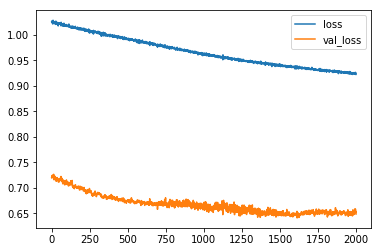

In [241]:
import matplotlib.pyplot as plt
Y_pred = NN_model.predict(X_test)
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
print(mean_squared_error(Y_pred, Y_test))

In [35]:
import pandas as pd
data = pd.read_csv("2017 high throughoutDFT calculations of formation energy stability and oxygen vacancy formation energy of ABO3 prerovskites.csv")
df= pd.DataFrame(data)
df_temp1= [df['B'] == 'Fe']
df_temp2= [df['B'] == 'Co']
name = ['Fe','Co']
df_temp = df[df['B'].isin(name)]
from sklearn.preprocessing import LabelEncoder
lt = LabelEncoder()
df_temp['Lowest distortion'] = lt.fit_transform(df_temp['Lowest distortion'])
df_temp['A'] = lt.fit_transform(df_temp['A'])

/Users/Heisen/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/Heisen/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [36]:
import numpy as np
df_temp['Valence A'].replace(r'\s+', np.nan, regex=True, inplace=True)
df_temp['Valence B'].replace(r'\s+', np.nan, regex=True, inplace=True)
#weirdString = '-'#df_temp['Vacancy energy [eV/O atom]'][0:]
#df_temp['Vacancy energy [eV/O atom]'].replace(weirdString, np.nan, inplace=True)
df_temp = df_temp.replace(to_replace='-',value=np.nan)
display(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 12 to 5275
Data columns (total 21 columns):
Chemical formula              146 non-null object
A                             146 non-null int64
B                             146 non-null object
In literature                 146 non-null bool
Valence A                     112 non-null object
Valence B                     112 non-null object
Radius A [ang]                146 non-null float64
Radius B [ang]                146 non-null float64
Lowest distortion             146 non-null int64
Formation energy [eV/atom]    142 non-null object
Stability [eV/atom]           142 non-null object
Magnetic moment [mu_B]        142 non-null object
Volume per atom [A^3/atom]    142 non-null object
Band gap [eV]                 142 non-null object
a [ang]                       142 non-null object
b [ang]                       142 non-null object
c [ang]                       142 non-null object
alpha [deg]                   142 non-null ob

/Users/Heisen/anaconda3/envs/ML/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


None

In [37]:
df_temp = df_temp.dropna()

In [38]:
df_temp = df_temp[['Radius A [ang]','Stability [eV/atom]',
                   'Volume per atom [A^3/atom]',
                    'Vacancy energy [eV/O atom]']]

In [39]:
df_temp = df_temp.astype(float)

In [40]:
#X = df_temp.values[:, 0:-1]
X = df_temp.values
Y = df_temp.values[:,-1]
print(Y)

[-1.991 -2.445  0.089 -0.724 -2.534 -3.619  0.663  1.185 -2.203 -1.666
  2.897  2.587  0.72   1.132 -0.458  0.208  3.21   4.094 -2.8   -0.624
 -1.758 -1.245 -1.005 -1.512  3.193  2.225  1.59   1.667 -1.547 -1.446
  3.384  0.905  0.461  0.8   -1.207 -0.324  2.32   3.094  0.504 -5.721
 -4.804  2.964  4.037 -0.831  1.89   2.726  0.07  -0.239  0.308 -0.95
 -2.265  0.373 -0.263  3.124  3.83   0.756  0.789 -0.712 -1.858  3.968
 -5.095 -4.592 -0.711 -2.494 -2.148 -2.602  2.075  1.172  1.089 -1.423
 -1.814  2.931  3.624  0.792  0.687  1.378 -0.411 -4.452  2.511  3.264
  1.913 -0.992  3.147  3.482  0.232 -0.463 -0.542 -0.727  2.096  2.865
  2.177 -1.853 -2.7   -2.876  3.19   1.336 -1.336 -0.75   1.235  1.3  ]


In [41]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# scaler = StandardScaler()
#scaler  = MinMaxScaler()
# X = scaler.fit_transform(X)
#Y = scaler.fit_transform(Y.reshape(-1,1))

In [42]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = SVR(gamma=0.1, kernel='linear',C = 1000)
clf.fit(X_train, Y_train) 
print(len(X_train), len(X_test))

80 20


0.006000629344018745


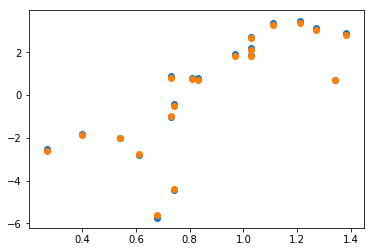

In [43]:
import matplotlib.pyplot as plt
Y_pred = clf.predict(X_test)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_pred,Y_test))
plt.scatter(X_test[:,0], Y_test)
plt.scatter(X_test[:,0], Y_pred)